МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

$\DeclareMathOperator*{\argmin}{arg\!min}$  
Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем отличается AdaBoost от XGBoost? Перечислите принципиальные отличия.  

Мне кажется, что основных отличий два:  
1) назначение исторически. AdaBoost создавался для решения задачи бинарной классификации. XGBoost же создавался как для решения задач классификации, так и для решения задач регрессии.  
2) Функция потерь. AdaBoost использует экспоненциальную функцию потерь:  
$L(y_i, a(x_i)) = \exp(-y_i\cdot a(x_i))$, где $y_i$ --- истинный ответ на $i$-м объекте, $a(x_i)$ --- предсказанный ответ алгоритма на объекте $x_i$. В свою очередь XGBoost работает с различными функциями потерь.

В целом, как я понимаю, AdaBoost является частным случаем XGBoost.

**Вопрос 2**: Почему говорят, что AdaBoost неустойчив к выбросам?

Потому что AdaBoost использует экспоненциальную функцию потерь $L(y_i, a(x_i)) = \exp(-y_i\cdot a(x_i))$, которая принимает большие значения при немалых отрицательных отступах. В таком случае базовые алгоритмы, которые строятся впоследствии, начинают "подстраиваться" под объекты-выбросы, что плохо.

**Вопрос 3**:  В каком пространстве градиентный бустинг совершает градиентный спуск? Какова размерность этого пространства?

В пространстве прогнозов алгоритма на обучающей выборке. На $N$-м шаге этого градиентного спуска вычисляется антиградиент функции потерь по прогнозам алгоритма на обучающей выборке:  
$s = -\nabla_z L(y, z) = (-L^\prime_{z_1}(y_1, a_{N-1}(x_1)), ..., -L^\prime_{z_l}(y_l, a_{N-1}(x_l)))$, где $z(x) = (a_{N-1}(x_1), ..., a_{N-1}(x_l))$ --- вектор-функция, а $a_{N-1}$ --- композиция, построенная на предыдущих $N-1$ шагах.

Т.к. описанный градиентный спуск подбирает $l$ параметров для выполнения шага, то размерность пространства совпадает с $l$ --- объемом обучающей выборки (количеством объектов в ней).

**Вопрос 4**: В чем заключается сокращение шага в градиентном бустинге? Как число итераций, необходимое для сходимости, зависит от размера шага η?

Сокращение шага заключается в том, что очередной базовый алгоритм при добавлении в композицию ранее построенных алгоритмов домножается на некоторый коэффициент $\alpha_N\in (0, 1]$. Это позволяет бороться с переобучением, но _увеличивает_ количество итераций, необходимых для сходимости.

Вообще можно подбирать $\alpha_N$, решая одномерную задачу оптимизации функции потерь на каждой итерации бустинга. Тогда на $N$-й итерации будем определять $\alpha_N$ по следующей формуле:  
$\alpha_N = \argmin_{\alpha > 0} \sum\limits_{i=1}^{l} L(a_{N-1} + \alpha\cdot b_N(x_i), y_i) $,  
где $l$ --- количество объектов в обучающей выборке, $a_{N-1}$ --- композиция базовых алгоритмов, полученная после шага $N-1$, $b_N$ --- базовый алгоритм, полученный на шаге $N$.

**Вопрос 5**: Что такое стохастический градиентный бустинг?

Это градиентный бустинг с использованием бэггинга: каждый базовый алгоритм будем обучать не на всей обучающей выборке, а на некоторой ее подвыборке фиксированного размера. Использование бэггинга в градиентном бустинге также является способом борьбы с переобучением.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Boosting</h1> 

1) Задача 1 
![](./img/task11.png)
![](./img/task12.png)

**Решение**  
Пусть все $\gamma_n = 1$, т.е. каждый базовый решающий пень будем добавлять в композицию с единичным весом. Выберем первый пень $b_1$ произвольным образом. Далее рассмотрим множество $X_{err}$ объектов, на которых первый пень ошибается. Выберем из $X_{err}$ произвольный объект $x^*$. Без ограничения общности можно считать, что $x^*$ принадлежит классу 1. Тогда $b_1(x^*)=-1$. Построим для $x^*$ два пня по следующим правилам:  

$b_{x^*}^1 (x) = -1$, если $x < x^*$;  
$b_{x^*}^1 (x) =  1$, если $x \ge x^*$;  
$b_{x^*}^2 (x) =  1$, если $x \le x^*$;  
$b_{x^*}^2 (x) = -1$, если $x > x^*$;  

Заметим, что  
$b_{x^*}^1(x) + b_{x^*}^2(x) = 0\; \forall x \ne x^*$ и  
$b_{x^*}^1(x^*) + b_{x^*}^2(x^*) = 2$,  

а тогда:  
$b_1(x) + b_{x^*}^1(x) + b_{x^*}^2(x) = b_1(x)\; \forall x \ne x^*$  
$b_1(x^*) + b_{x^*}^1(x^*) + b_{x^*}^2(x^*) = 1$.

Таким образом, прибавление двух пней ($b_{x^*}^1(x)$ и $b_{x^*}^2(x)$) "исправляет" значение композиции для объекта $x^*$, но не меняет ответов на других объектах.

Тогда можем повторить эту процедуру для всех объектов из $X_{err}$. В итоге, даже если пень $b_1(x)$ классифицировал все объекты неверно, то $|X_{err}| = |X| = l$. Добавляя по два пня на каждый объект из $X_{err}$ по вышеописанной процедуре, получим $2l + 1$ пень ($b_1(x)$ + по 2 на каждый из $l$ объектов).

Таким образом, мы получили композицию, состоящую из $\le 2l+1$ пней и не допускающую ошибок на обучающей выборке.

2) Найдите градиент логистичиской функции потерь для фиксированного объекта

**Решение**  
Логистическая функция потерь: $L(y, a(x)) = \ln(1 + \exp(-a(x)\cdot y))$. Это функция _одного_ аргумента $x$. Считать градиент от функции одного переменного я не умею. Судя по всему, автор задания имел в виду подсчет _одной компоненты вектора градиента по прогнозу композиции_, который (градиент) вычисляется на каждой итерации градиентного бустинга.  
$-s = \nabla_z L(y, z) = (L^\prime_{z_1}(y_1, a_{N-1}(x_1)), ..., L^\prime_{z_l}(y_l, a_{N-1}(x_l)))$, где $z(x) = (a_{N-1}(x_1), ..., a_{N-1}(x_l))$.  

В таком случае $i$-ая компонента вектора $-s$ будет вычисляться так:
$L^\prime_{z_i}(y_i, z_i) = \frac {1}{1 + e^{-z_i\cdot y_i}}\cdot (-y_i)\cdot e^{-z_iy_i} = $
$ \frac {-y_i e^{-z_i y_i}} {1 + e^{-z_i y_i}} = \frac {-y_i} {1 + e^{z_i y_i}} $.

<h1 align="center">Binary Boosting Implementation</h1> 

Нужно реализовать двухклассовый бустинг с логистичиской функцией потерь. 

Длину шага -- или используйте $1.0*lr$ или подбирайте одномерной оптимизацией;

In [1]:
%pylab inline

import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
from utils import plot_surface
from scipy.stats import mode
from scipy.optimize import minimize_scalar
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import zero_one_loss

warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
class BinaryBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, lr='auto', max_depth=3):
        self.lr = lr # learning rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
    
    def loss_grad(self, original_y, pred_y):
        return np.divide(original_y, (1 + np.exp(np.multiply(original_y, pred_y))))
        # АНТИ-градиент на каждом объекте
        
    def loss(self, original_y, pred_y):
        return np.log(1 + np.exp(-np.multiply(original_y, pred_y)))
        
    def fit(self, X, original_y):
        # Храните базовые алгоритмы тут
        self.estimators_ = []
        self.weights_ = []
        self.most_frequent_class = mode(original_y).mode[0]
        
        for estimator_index in range(self.n_estimators):
            if estimator_index > 0:
                previous_pred = self._predict(X)
                grad = self.loss_grad(original_y, previous_pred)
            else:
                previous_pred = np.array([self.most_frequent_class] * X.shape[0])
                grad = previous_pred
            
            # Настройте базовый алгоритм на градиент, это классификация или регрессия? - регрессия
            estimator = DecisionTreeRegressor(max_depth=self.max_depth)
            estimator.fit(X, grad)
            
            if self.lr == 'auto':
                current_tree_pred = estimator.predict(X)
                f = lambda alpha: np.sum(self.loss(original_y, previous_pred + alpha * current_tree_pred))
                weight = minimize_scalar(f, method='bounded', bounds=(0, 1)).x
            else:
                weight = self.lr
                
            self.estimators_.append(estimator)
            self.weights_.append(weight)
            
        self.out_ = self.outliers(grad)

        return self

    def _predict(self, X):
        weights_ = np.reshape(self.weights_, (-1, 1))
        y_pred = np.sum(weights_ * np.array([estimator.predict(X) for estimator in self.estimators_]), axis=0)
        return y_pred
    
    def predict(self, X):
        y_pred = self._predict(X)
        np.place(y_pred, y_pred == 0, self.most_frequent_class)
        y_pred = np.sign(y_pred)
        return y_pred
    
    def outliers(self, grad):
        # Топ-10 объектов с большим отступом
        top_size = min(10, grad.shape[0])
        return np.argsort(np.absolute(grad))[-top_size:][::-1]

# classifier = BinaryBoostingClassifier(n_estimators=5, lr=None)
# X = np.array([[1, 0, 0],
#               [0, 1, 0],
#               [0, 0, 1],
#               [1, 0, 1]])
# y = np.array([1, -1, 1, 1])
# classifier.fit(X, y)
# classifier.predict(X)

<h1 align="center">Simple test</h1> 

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
y = 2*(y-0.5)

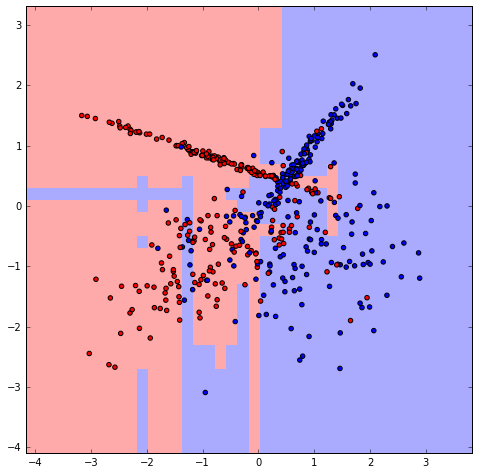

In [4]:
clf = BinaryBoostingClassifier().fit(X, y)
plot_surface(X, y, clf)

<h1 align="center">Outliers</h1> 

[416 379 386  80 265 220 212 343 306 317]


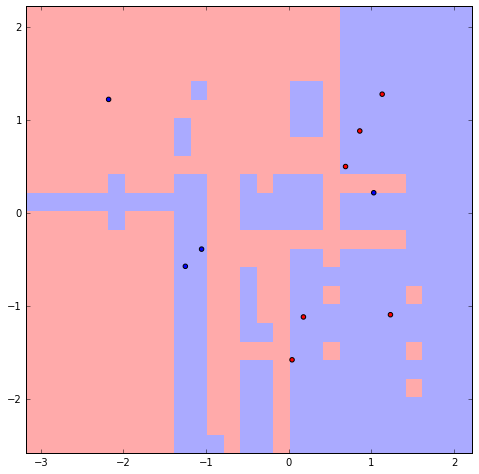

In [5]:
# <Нарисуйте только outliers> 
outliers = clf.out_
print outliers
plot_surface(X[outliers], y[outliers], clf)

<h1 align="center">Adult test</h1> 

In [6]:
# !sh ./get_data.sh

In [7]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [8]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)

Сверьте качество своего алгоритма с GradientBoostingClassifier

In [9]:
%%time
cv_gbc = np.mean(cross_val_score(GradientBoostingClassifier(), X, y))
print 'GradientBoostingClassifier: ', cv_gbc

GradientBoostingClassifier:  0.865759781029
CPU times: user 1min 1s, sys: 84 ms, total: 1min 2s
Wall time: 1min 2s


In [10]:
%%time
cv_bbc = np.mean(cross_val_score(BinaryBoostingClassifier(), X, y))
print 'BinaryBoostingClassifier: ', cv_bbc

BinaryBoostingClassifier:  0.868063110479
CPU times: user 3min 22s, sys: 336 ms, total: 3min 22s
Wall time: 3min 22s


<h1 align="center">Text classification</h1> 

- Найдите двухклассовый текстовый датасет (в качестве примера sentiment analysis) или возьмите многоклассовый и классифцируйте один клас против остальных
- Попробуйте бустинг на решающих деревьях, в качестве фичей используйте tf-idf и svd/random_projection/hashing_trick, что работает лучше? Сравните качество и время работы.

In [32]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection
from sklearn.feature_extraction.text import HashingVectorizer

In [14]:
def load_newsgroups_data():
    newsgroups_train = fetch_20newsgroups(subset='train')
    newsgroups_test = fetch_20newsgroups(subset='test')
    return newsgroups_train, newsgroups_test

def binarize_newsgroups_data(newsgroups_train, newsgroups_test, vectorizer, reductor=None):
    if reductor is not None:
        pipeline = Pipeline(steps = [('vectorizer', vectorizer), ('reductor', reductor)])
    else:
        pipeline = Pipeline(steps = [('vectorizer', vectorizer)])
    X_train, y_train = pipeline.fit_transform(newsgroups_train.data), newsgroups_train.target
    X_test,  y_test  = pipeline.transform(newsgroups_test.data), newsgroups_test.target
#     train_size = 2000
#     test_size = 1000
#     X_train, y_train = X_train[:train_size][:], y_train[:train_size]
#     X_test, y_test = X_test[:test_size][:], y_test[:test_size]
    np.place(y_train, y_train < 9, -1)
    np.place(y_train, y_train >= 9, 1)
    np.place(y_test, y_test < 9, -1)
    np.place(y_test, y_test >= 9, 1)
    return X_train, X_test, y_train, y_test

def load_binarized_newsgroups_data(vectorizer, reductor=None):
    newsgroups_train, newsgroups_test = load_newsgroups_data()
    return binarize_newsgroups_data(newsgroups_train, newsgroups_test, vectorizer, reductor)

def zero_one_loss_with_binary_boosting(X_train, X_test, y_train, y_test):
    n_estimators = 100
    clf = BinaryBoostingClassifier()
    clf.fit(X_train, y_train)
    return zero_one_loss(y_test, clf.predict(X_test), normalize=True)

__TfidfVectorizer + TruncatedSVD__

In [15]:
X_train, X_test, y_train, y_test = load_binarized_newsgroups_data(TfidfVectorizer(), 
                                                                  TruncatedSVD(n_components=100))

In [16]:
%%time
print zero_one_loss_with_binary_boosting(X_train, X_test, y_train, y_test)

0.127588953797
CPU times: user 1min 23s, sys: 16 ms, total: 1min 23s
Wall time: 1min 23s


__TfidfVectorizer + SparseRandomProjection__

In [17]:
X_train, X_test, y_train, y_test = load_binarized_newsgroups_data(TfidfVectorizer(),
                                                                  SparseRandomProjection(n_components=100))

In [18]:
%%time
print zero_one_loss_with_binary_boosting(X_train, X_test, y_train, y_test)

0.285448751992
CPU times: user 45.1 s, sys: 48 ms, total: 45.1 s
Wall time: 45.2 s


__TfidfVectorizer + FeatureHasher__

In [19]:
X_train, X_test, y_train, y_test = load_binarized_newsgroups_data(HashingVectorizer(n_features=100))

In [20]:
%%time
print zero_one_loss_with_binary_boosting(X_train, X_test, y_train, y_test)

0.284519383962
CPU times: user 1min 32s, sys: 108 ms, total: 1min 32s
Wall time: 1min 32s


FeatureHasher работает немного дольше остальных методов.
TruncatedSVD показал намного лучшее качество по сравнению с остальными методами.

<h1 align="center">Random Forest vs Boosting</h1> 

Подберите 2+ датасета как минимум большой и маленький (не использованных в этом дз) и проведите сравнение random forest и градиентного бустинга, используйте реализации алгоритмов из библиотеки sklearn.

- Опишите результаты, почему тот или другой алгоритм на конкретном датасете работает лучше/хуже?
- Как вы настраивали гиперпараметры алгоритмов?
- Как вы проверяли качесво алгоритмов?

In [21]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

In [22]:
def param_search_forest(X, y):
    estimator = RandomForestClassifier()
    param_grid = {'n_estimators': [10, 50, 100, 150, 200],
                  'max_features': ['sqrt', 'log2', None],
                  'max_depth': [5, 10, 50, None]}
    cv = StratifiedShuffleSplit(y, n_iter=3, test_size=0.2)
    grid_cv = GridSearchCV(estimator, param_grid, cv=cv)
    return grid_cv

def param_search_boosting(X, y):
    estimator = GradientBoostingClassifier()
    param_grid = {'n_estimators': [10, 50, 100, 150, 200],
                  'max_features': ['sqrt', 'log2', None],
                  'max_depth': [5, 10, 50, None]}
    cv = StratifiedShuffleSplit(y, n_iter=3, test_size=0.2)
    
    grid_cv = GridSearchCV(estimator, param_grid, cv=cv)
    return grid_cv

In [23]:
# First dataset
n_samples = 500
print 'Test with {} samples'.format(n_samples)
X, y = make_classification(n_samples=n_samples, random_state=42)

Test with 500 samples


In [24]:
%%time
print 'RandomForestClassifier results'
grid_cv = param_search_forest(X, y)
grid_cv.fit(X, y)
print grid_cv.best_score_
print grid_cv.best_params_

RandomForestClassifier results
0.96
{'max_features': 'log2', 'n_estimators': 100, 'max_depth': None}
CPU times: user 1min 43s, sys: 300 ms, total: 1min 43s
Wall time: 1min 43s


In [25]:
%%time
print 'GradientBoostingClassifier results'
grid_cv = param_search_boosting(X, y)
grid_cv.fit(X, y)
print grid_cv.best_score_
print grid_cv.best_params_

GradientBoostingClassifier results
0.963333333333
{'max_features': 'log2', 'n_estimators': 100, 'max_depth': None}
CPU times: user 46.9 s, sys: 28 ms, total: 47 s
Wall time: 47 s


In [26]:
# Second dataset
n_samples = 10000 # больше не брал, дабы дождаться cross_val_score
print 'Test with {} samples'.format(n_samples)
X, y = make_classification(n_samples=n_samples, random_state=42)

Test with 10000 samples


In [27]:
%%time
print 'RandomForestClassifier results'
grid_cv = param_search_forest(X, y)
grid_cv.fit(X, y)
print grid_cv.best_score_
print grid_cv.best_params_

RandomForestClassifier results
0.943666666667
{'max_features': None, 'n_estimators': 200, 'max_depth': None}
CPU times: user 26min 47s, sys: 2.26 s, total: 26min 49s
Wall time: 26min 51s


In [28]:
%%time
print 'GradientBoostingClassifier results'
grid_cv = param_search_boosting(X, y)
grid_cv.fit(X, y)
print grid_cv.best_score_
print grid_cv.best_params_

GradientBoostingClassifier results
0.943
{'max_features': 'log2', 'n_estimators': 100, 'max_depth': None}
CPU times: user 25min 33s, sys: 1.92 s, total: 25min 34s
Wall time: 25min 36s


Результаты обоих алгоритмов на обоих датасетах близки. На маленьком датасете (500 объектов) GradientBoostingClassifier справился лучше, в свою очередь на большом датасете (10000 объектов) RandomForestClassifier показал лучший результат.
Гиперпараметры настраивал с помощью поиска по сетке (GridSearch).
Качество проверял с помощью cross_val_score, который считается внутри GridSearch.

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте мультиклассовый бустинг -- проверьте на CIFAR10 + SVD
- Попробуйте различные функции потерь, придумайте несколько своих, удалось ли обойти логистичискую и экспоненциальную?

In [29]:
# Classifier based on gradient boosting that uses one-vs-all strategy
class MultiBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, lr='auto', max_depth=3, class_labels=None, balancing=None):
        self.lr = lr # learning rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.class_labels = class_labels
        self.balancing = balancing
    
    def _undersample(self, X, y, class_label):
        class_mask = y == class_label
        positive_class_idx = np.nonzero(class_mask)[0]
        negative_class_idx = np.nonzero(~class_mask)[0]
        negative_class_idx_chosen = np.random.randint(0, 
                                                      high=negative_class_idx.shape[0],
                                                      size=positive_class_idx.shape[0])
        negative_class_idx = negative_class_idx[negative_class_idx_chosen]
        X_new = np.vstack((X[positive_class_idx], X[negative_class_idx]))
        y_new = np.append(y[positive_class_idx], y[negative_class_idx])
        return X_new, y_new
    
    def _oversample(self, X, y, class_label):
        class_mask = y == class_label
        positive_class_idx = np.nonzero(class_mask)[0]
        negative_class_idx = np.nonzero(~class_mask)[0]
        positive_class_add_size = abs(negative_class_idx.shape[0] - positive_class_idx.shape[0]) / 3
        positive_class_idx_chosen = np.random.randint(0, 
                                                      high=positive_class_idx.shape[0],
                                                      size=positive_class_add_size)
        positive_class_idx = positive_class_idx[positive_class_idx_chosen]
        X_new = np.vstack((X, X[positive_class_idx]))
        y_new = np.append(y, y[positive_class_idx])
        return X_new, y_new
    
    def _binarizeLabels(self, y, class_label):
        label_converter = lambda label: 1 if label == class_label else -1
        return np.array(map(label_converter, list(y)))
    
    def fit(self, X, original_y):
        self.binary_clfs = []
        if self.class_labels is None:
            self.class_labels = np.unique(original_y)
        for class_label in self.class_labels:
            print 'CL: {}'.format(class_label)
            # balance classes
            if self.balancing == 'under':
                X_train, y_train = self._undersample(X, original_y, class_label)
            elif self.balancing == 'over':
                X_train, y_train = self._oversample(X, original_y, class_label)
            else:
                X_train, y_train = X, original_y
            y_train = self._binarizeLabels(y_train, class_label)
            
#             binary_clf = BinaryBoostingClassifier(self.n_estimators, self.lr, max_depth=self.max_depth) #works slowly
            binary_clf = GradientBoostingClassifier(n_estimators=self.n_estimators, 
                                                    learning_rate=0.1,
                                                    max_depth=self.max_depth)
            binary_clf.fit(X_train, y_train)
            self.binary_clfs.append(binary_clf)
        return self

    def _predict(self, X):
        return np.array([binary_clf.predict_proba(X)[:, 1] for binary_clf in self.binary_clfs])
        #return np.array([binary_clf._predict(X) for binary_clf in self.binary_clfs])
    
    def predict(self, X):
        predictions = self._predict(X)
        class_predictions = np.argmax(predictions, axis=0)
        return self.class_labels[class_predictions]

# classifier = MultiBoostingClassifier(n_estimators=2)
# X = np.array([[0, 0, 0],
#               [0, 0, 1],
#               [0, 1, 0],
#               [0, 1, 1],
#               [1, 0, 0],
#               [1, 0, 1],
#               [1, 1, 0],
#               [1, 1, 1]])
# y = np.array([1, 0, 2, 0, 1, 2, 0, 1])
# classifier.fit(X, y)
# classifier.predict(X)

In [30]:
from utils_1 import load_cifar10
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10('./data/cifar10')[0]
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [33]:
svd = TruncatedSVD(n_components=100)
X_train = svd.fit_transform(X_train)
X_test  = svd.transform(X_test)
print X_train.shape
print X_test.shape

(50000, 100)
(10000, 100)


__Undersampling__

In [42]:
%%time
clf = MultiBoostingClassifier(class_labels=np.arange(10), balancing='under')
clf.fit(X_train, y_train)

CL: 0
CL: 1
CL: 2
CL: 3
CL: 4
CL: 5
CL: 6
CL: 7
CL: 8
CL: 9
CPU times: user 3min 16s, sys: 504 ms, total: 3min 17s
Wall time: 3min 18s


In [43]:
%%time
print zero_one_loss(clf.predict(X_train), y_train), zero_one_loss(clf.predict(X_test), y_test)

0.50162 0.5504
CPU times: user 5.24 s, sys: 0 ns, total: 5.24 s
Wall time: 5.25 s


__Oversampling__

In [44]:
%%time
clf = MultiBoostingClassifier(class_labels=np.arange(10), balancing='over')
clf.fit(X_train, y_train)

CL: 0
CL: 1
CL: 2
CL: 3
CL: 4
CL: 5
CL: 6
CL: 7
CL: 8
CL: 9
CPU times: user 33min 48s, sys: 3.41 s, total: 33min 52s
Wall time: 33min 56s


In [45]:
%%time
print zero_one_loss(clf.predict(X_train), y_train), zero_one_loss(clf.predict(X_test), y_test)

0.48754 0.5446
CPU times: user 6.32 s, sys: 8 ms, total: 6.33 s
Wall time: 6.36 s


__No balancing__

In [46]:
%%time
clf = MultiBoostingClassifier(class_labels=np.arange(10))
clf.fit(X_train, y_train)

CL: 0
CL: 1
CL: 2
CL: 3
CL: 4
CL: 5
CL: 6
CL: 7
CL: 8
CL: 9
CPU times: user 27min 47s, sys: 1.9 s, total: 27min 48s
Wall time: 27min 52s


In [48]:
%%time
print zero_one_loss(clf.predict(X_train), y_train), zero_one_loss(clf.predict(X_test), y_test)

0.47906 0.5466
CPU times: user 5.14 s, sys: 4 ms, total: 5.15 s
Wall time: 5.16 s


__Loss functions__

In [53]:
# defined be my sqrt loss function
def sqrt_loss_margin(margin):
    return 0 if margin >= 0 else np.sqrt(1-margin)
    
def sqrt_loss(y_true, y_pred):
    return sqrt_loss_margin(y_true * y_pred)
    
# defined be my arctan loss function
def arctan_loss_margin(margin):
    return np.pi / 2 - np.arctan(margin + np.tan(np.pi / 2 - 1))

def arctan_loss(y_true, y_pred):
    return arctan_loss_margin(y_true * y_pred)

# classic 0-1 loss function
def zero_one_loss_margin(margin):
    return 0 if margin >= 0 else 1

sqrt_loss_margin = np.vectorize(sqrt_loss_margin)
arctan_loss_margin = np.vectorize(arctan_loss_margin)
zero_one_loss_margin = np.vectorize(zero_one_loss_margin)

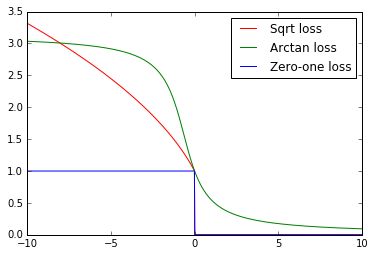

In [48]:
Xs = np.linspace(-10, 10, num=1000)
plt.plot(Xs, sqrt_loss_margin(Xs), label='Sqrt loss', color='r')
plt.plot(Xs, arctan_loss_margin(Xs), label='Arctan loss', color='g')
plt.plot(Xs, zero_one_loss_margin(Xs), label='Zero-one loss', color='b')
plt.legend()

Учитывая, что в классы sklearn нельзя передать пользовательскую функцию потерь, я не могу построить GradientBoostingClassifier на основе определенных мною функций потерь. Поэтому я воспользуюсь ими, чтобы оценить предсказание уже построенной модели.

In [57]:
from sklearn.cross_validation import train_test_split

adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
%%time
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 22.7 s, sys: 36 ms, total: 22.7 s
Wall time: 22.8 s


In [59]:
arctan_loss_score = np.mean(arctan_loss(y_test, y_pred))
sqrt_loss_score = np.mean(sqrt_loss(y_test, y_pred))
zero_one_loss_score = zero_one_loss(y_test, y_pred, normalize=True)
logistic_loss_score = np.mean(BinaryBoostingClassifier().loss(y_test, y_pred))

print 'Arctan loss:', arctan_loss_score
print 'Sqrt loss:', sqrt_loss_score
print 'Zero-one loss:', zero_one_loss_score
print 'Logistic loss:', logistic_loss_score

Arctan loss: 0.723795240562
Sqrt loss: 0.129286518579
Zero-one loss: 0.129286518579
Logistic loss: 0.442548206097
